## MMseqs Prefilter

### MMseqs Dataset

In [9]:
#imports
from __future__ import print_function
import sys
import os
import psutil
import math
import numpy as np
import pandas as pd
import cv2 as cv
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import statsmodels.api as sm
import statistics as stats

matplotlib.rcParams['figure.dpi'] = 300
pd.set_option('display.max_columns', None)  

In [10]:
# data filepaths
data_path = "/home/devreckas/Google-Drive/Wheeler-Labs/Personal_Work/fb-pruner/fb-pruner/accessories/count_tbl.csv"


In [11]:
# header and datatype
header = {
    "kmer": "int64",
    "kscore": "int64",
    "true": "int64",
    "false": "int64",
    "unknown": "int64",
    "total_true": "int64",
    "total_false": "int64",
    "total_unknown": "int64"
}
keys = header.keys()

In [12]:
# load data
names=keys
sep=" "
data = pd.read_csv(data_path, sep=sep, names=names, header=None)
data

,kmer,kscore,true,false,unknown,total_true,total_false,total_unknown
0,5,45,7116,80839561,4765879,12764,428200000,24709363
1,5,55,8218,80579512,4751863,12764,428200000,24709363
2,5,65,8312,77781167,4577653,12764,428200000,24709363
3,5,75,7229,59582932,3493326,12764,428200000,24709363
4,5,85,5219,24127322,1417285,12764,428200000,24709363
5,5,95,3258,6232570,367210,12764,428200000,24709363
6,6,45,8658,80805871,4825471,12764,428200000,24709363
7,6,55,9565,80777985,4833174,12764,428200000,24709363
8,6,65,9727,80476140,4816540,12764,428200000,24709363
9,6,75,9292,76986824,4596273,12764,428200000,24709363


In [13]:
# split kmer by length
kmers = [5, 6, 7]
kmer_data = []

for i in range(len(kmers)):
    kmer_data.append( data[(data["kmer"] == kmers[i]) & (data["kscore"] >= 55)] )


In [19]:
# hmmer true/false
data_len = len(kmer_data[i]["kscore"])
hmmer = {}
hmmer["T"] = [10615] * data_len
hmmer["F"] = [1992] * data_len
hmmer["?"] = [1214] * data_len

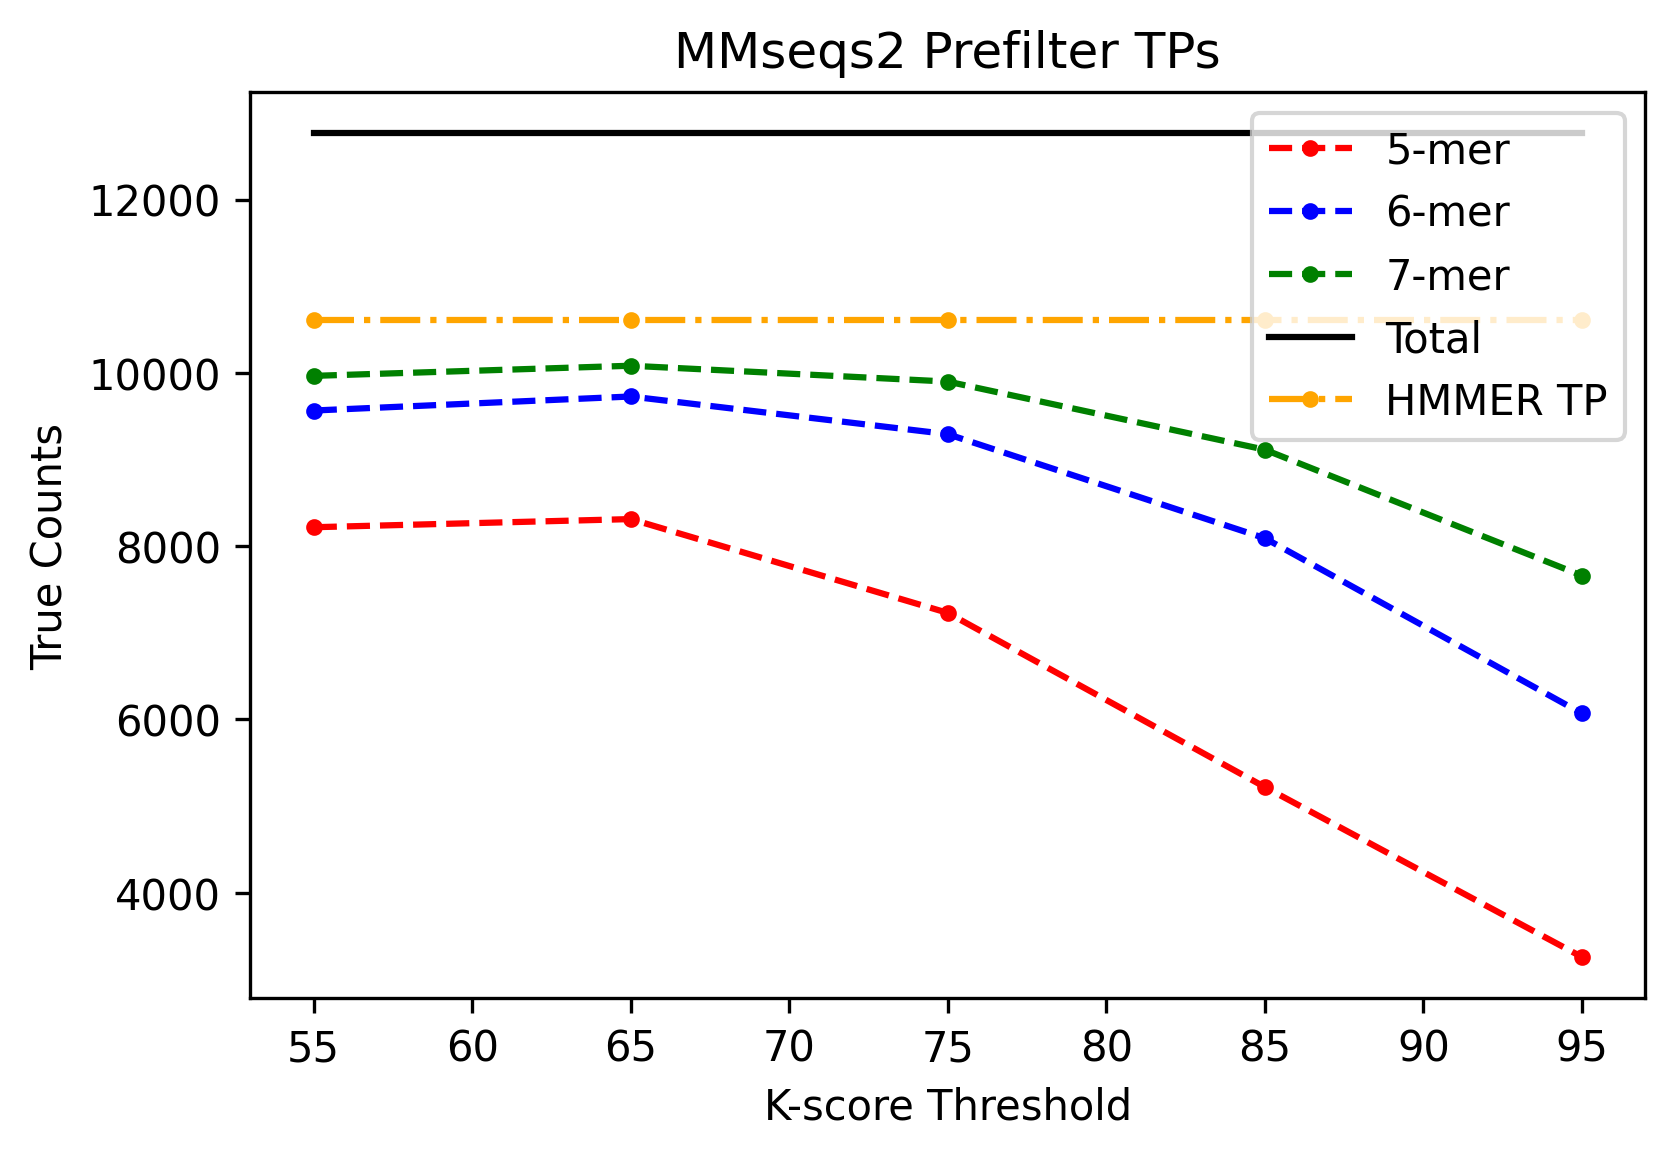

In [40]:
# plot kmer/kscores

colors = ['red', 'blue', 'green']
labels = ['5-mer', '6-mer', '7-mer']
for i in range(len(kmer_data)):
    plt.plot( kmer_data[i]["kscore"], (kmer_data[i]["true"]), color=colors[i], label=labels[i], linestyle="--", marker="." )
#     plt.plot( kmer_data[i]["kscore"], (kmer_data[i]["true"]), color=colors[i], label=labels[i], linestyle="--" )

# total
plt.plot( kmer_data[i]["kscore"], kmer_data[i]["total_true"], color="black", label="Total", linestyle="-" )
plt.plot( kmer_data[i]["kscore"], hmmer["T"], color="orange", label="HMMER TP", linestyle="-.", marker="." )

plt.title('MMseqs2 Prefilter TPs')
plt.legend(loc='upper right')
plt.xlabel('K-score Threshold')
plt.ylabel('True Counts')
#plt.savefig("")
plt.show()

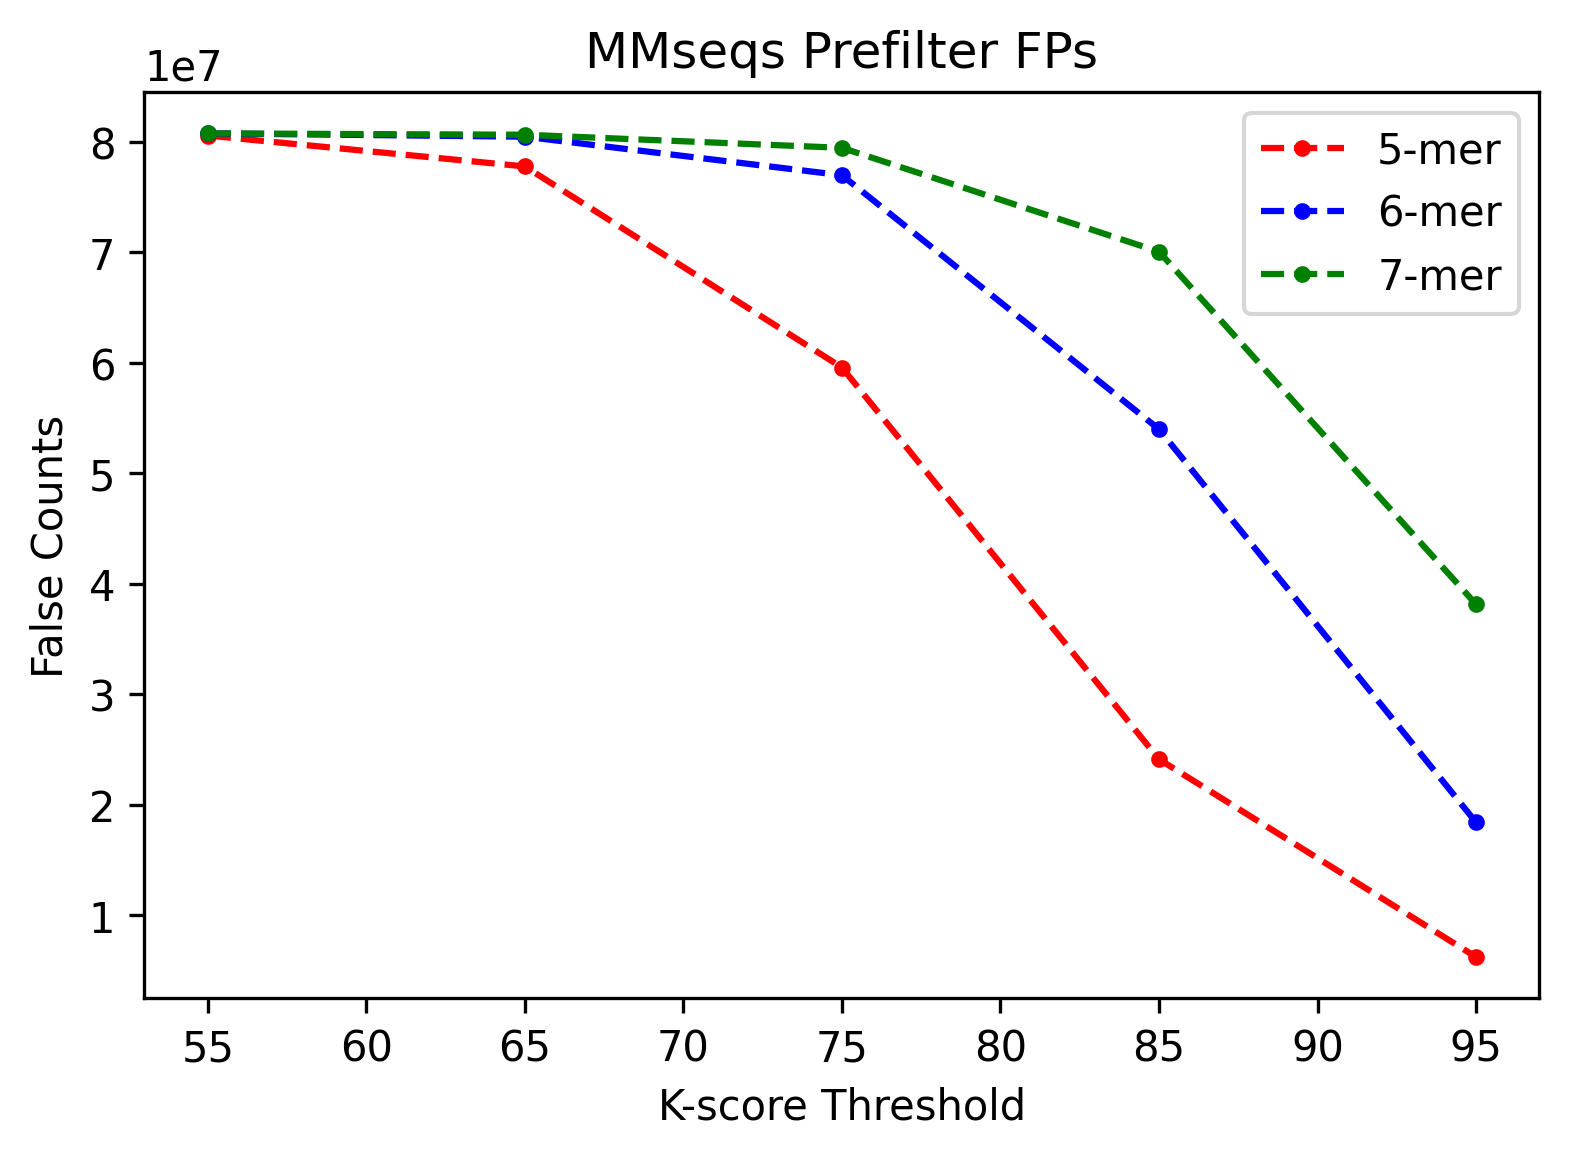

In [32]:
# plot kmer/kscores

colors = ['red', 'blue', 'green']
labels = ['5-mer', '6-mer', '7-mer']
for i in range(len(kmer_data)):
    plt.plot( kmer_data[i]["kscore"], (kmer_data[i]["false"]), color=colors[i], label=labels[i], linestyle="--", marker="." )
#     plt.plot( kmer_data[i]["kscore"], (kmer_data[i]["true"]), color=colors[i], label=labels[i], linestyle="--" )

# total counts
# plt.plot( kmer_data[i]["kscore"], kmer_data[i]["total_false"], color="black", label="Total", linestyle="-" )

plt.title('MMseqs Prefilter FPs')
plt.legend(loc='upper right')
plt.xlabel('K-score Threshold')
plt.ylabel('False Counts')
#plt.savefig("")
plt.show()

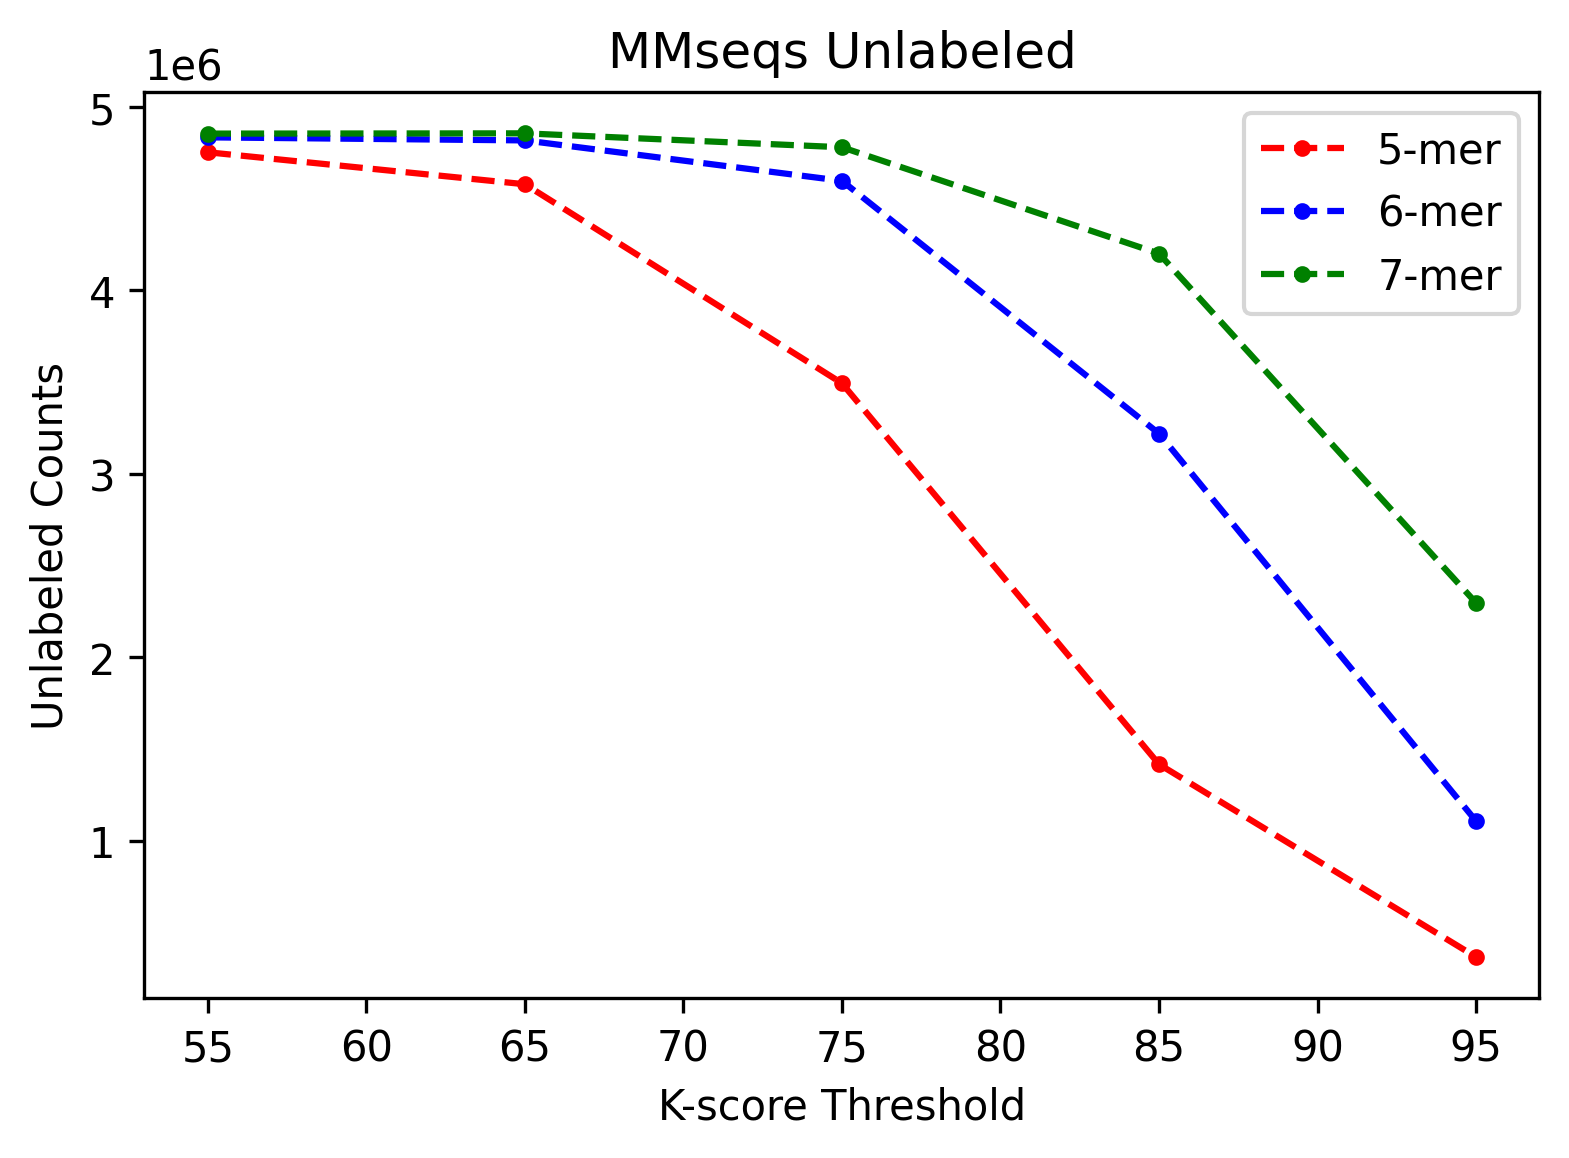

In [33]:
# plot kmer/kscores

colors = ['red', 'blue', 'green']
labels = ['5-mer', '6-mer', '7-mer']
for i in range(len(kmer_data)):
    plt.plot( kmer_data[i]["kscore"], (kmer_data[i]["unknown"]), color=colors[i], label=labels[i], linestyle="--", marker="." )
#     plt.plot( kmer_data[i]["kscore"], (kmer_data[i]["true"]), color=colors[i], label=labels[i], linestyle="--" )

# total counts
# plt.plot( kmer_data[i]["kscore"], kmer_data[i]["total_false"], color="black", label="Total", linestyle="-" )

plt.title('MMseqs Unlabeled')
plt.legend(loc='upper right')
plt.xlabel('K-score Threshold')
plt.ylabel('Unlabeled Counts')
#plt.savefig("")
plt.show()